# Working with APIs

In [1]:
import requests

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# Following along in a tutorial
Tutorial: https://www.youtube.com/watch?v=2HfSFdPEFRg<br>
Also, to make requests using jupyter labs, you must paste "jupyter lab --NotebookApp.iopub_data_rate_limit=1e10" into your Conda environment(what you open jupyter labs with) <br>
If you are using jupyter notebook, change the word "lab" into "notebook" <br>
If you get the error "TypeError: warn() missing 1 required keyword-only argument: 'stacklevel'", then paste "conda install traitlets==5.9.0 -c conda-forge" into Conda <br>
Note that the API key is copied from my personal key from the coinmarket website (I am using a free account)

In [35]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '61e49379-88e5-4dc1-8d67-87ac949268fe',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-01-17T23:13:31.374Z', 'error_code': 0, 'error_message': None, 'elapsed': 73, 'credit_count': 25, 'notice': None, 'total_count': 8738}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10747, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

# Normalize the data

In [6]:
import pandas as pd

In [36]:
pd.json_normalize(data['data'])
#pd.set_option('display.max_columns', None)

id              name   symbol              slug  num_market_pairs  \
0         1           Bitcoin      BTC           bitcoin             10747   
1      1027          Ethereum      ETH          ethereum              8265   
2       825       Tether USDt     USDT            tether             71917   
3      1839               BNB      BNB               bnb              2018   
4      5426            Solana      SOL            solana               616   
...     ...               ...      ...               ...               ...   
4995  25645      Bob LION Inu  BNBLION      bob-lion-inu                 1   
4996  18699    Shade Protocol      SHD    shade-protocol                 4   
4997  22057        LUCKY CATS     KATZ        lucky-cats                 2   
4998  28102         BookieBot       BB         bookiebot                 2   
4999  25247  Sui Launch Token      SLT  sui-launch-token                11   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
4995  2023-05-22T09:01:02.000Z   
4996  2022-03-10T06:15:34.000Z   
4997  2022-10-03T14:01:54.000Z   
4998  2023-09-20T17:41:50.000Z   
4999  2023-05-12T16:04:55.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [payments, stablecoin, asset-backed-stablecoin...           NaN   
3     [marketplace, centralized-exchange, payments, ...           NaN   
4     [pos, platform, solana-ecosystem, cms-holdings...           NaN   
...                                                 ...           ...   
4995                                                 []  1.000000e+11   
4996                                                 []           NaN   
4997                                                 []  1.000000e+08   
4998                                                 []  1.000000e+06   
4999                                    [sui-ecosystem]  3.000000e+08   

      circulating_supply        total_supply  ...  quote.USD.market_cap  \
0           1.960114e+07            19601143  ...          8.363011e+11   
1           1.201797e+08    120179738.316518  ...          3.031112e+11   
2           9.518478e+10  98601637401.435104  ...          9.511501e+10   
3           1.495492e+08    149549239.503933  ...          4.621260e+10   
4           4.328072e+08     567395541.58011  ...          4.348439e+10   
...                  ...                 ...  ...                   ...   
4995        0.000000e+00        100000000000  ...          0.000000e+00   
4996        0.000000e+00            10000000  ...          0.000000e+00   
4997        0.000000e+00           100000000  ...          0.000000e+00   
4998        0.000000e+00             1000000  ...          0.000000e+00   
4999        0.000000e+00           127000099  ...          0.000000e+00   

      quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                            49.8142                        8.959847e+11   
1                            18.0548                        3.031112e+11   
2                             5.6653                        9.852936e+10   
3                             2.7526                        4.621260e+10   
4                             2.5901                        5.700657e+10   
...                              ...                                 ...   
4995                          0.0000                        0.000000e+00   
4996                          0.0000                        5.991237e+07   
4997                          0.0000                        3.791159e+04   
4998                          0.0000                        1.120442e+06   
4999                          0.0000             

# Doing the same with Indeed API (Cannot, It has been depriciated)

# New Plan
Because all of the apis for the job posting sites I have searched for an api  have been depriciated (simplyhired, indeed, and glassdoor), I will instead use the above crypto api for my project. <br>
I will make a demo graph using the above data and use that for the website

In [37]:
df = pd.json_normalize(data['data'])
df

id              name   symbol              slug  num_market_pairs  \
0         1           Bitcoin      BTC           bitcoin             10747   
1      1027          Ethereum      ETH          ethereum              8265   
2       825       Tether USDt     USDT            tether             71917   
3      1839               BNB      BNB               bnb              2018   
4      5426            Solana      SOL            solana               616   
...     ...               ...      ...               ...               ...   
4995  25645      Bob LION Inu  BNBLION      bob-lion-inu                 1   
4996  18699    Shade Protocol      SHD    shade-protocol                 4   
4997  22057        LUCKY CATS     KATZ        lucky-cats                 2   
4998  28102         BookieBot       BB         bookiebot                 2   
4999  25247  Sui Launch Token      SLT  sui-launch-token                11   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
4995  2023-05-22T09:01:02.000Z   
4996  2022-03-10T06:15:34.000Z   
4997  2022-10-03T14:01:54.000Z   
4998  2023-09-20T17:41:50.000Z   
4999  2023-05-12T16:04:55.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [payments, stablecoin, asset-backed-stablecoin...           NaN   
3     [marketplace, centralized-exchange, payments, ...           NaN   
4     [pos, platform, solana-ecosystem, cms-holdings...           NaN   
...                                                 ...           ...   
4995                                                 []  1.000000e+11   
4996                                                 []           NaN   
4997                                                 []  1.000000e+08   
4998                                                 []  1.000000e+06   
4999                                    [sui-ecosystem]  3.000000e+08   

      circulating_supply        total_supply  ...  quote.USD.market_cap  \
0           1.960114e+07            19601143  ...          8.363011e+11   
1           1.201797e+08    120179738.316518  ...          3.031112e+11   
2           9.518478e+10  98601637401.435104  ...          9.511501e+10   
3           1.495492e+08    149549239.503933  ...          4.621260e+10   
4           4.328072e+08     567395541.58011  ...          4.348439e+10   
...                  ...                 ...  ...                   ...   
4995        0.000000e+00        100000000000  ...          0.000000e+00   
4996        0.000000e+00            10000000  ...          0.000000e+00   
4997        0.000000e+00           100000000  ...          0.000000e+00   
4998        0.000000e+00             1000000  ...          0.000000e+00   
4999        0.000000e+00           127000099  ...          0.000000e+00   

      quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                            49.8142                        8.959847e+11   
1                            18.0548                        3.031112e+11   
2                             5.6653                        9.852936e+10   
3                             2.7526                        4.621260e+10   
4                             2.5901                        5.700657e+10   
...                              ...                                 ...   
4995                          0.0000                        0.000000e+00   
4996                          0.0000                        5.991237e+07   
4997                          0.0000                        3.791159e+04   
4998                          0.0000                        1.120442e+06   
4999                          0.0000             

In [11]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address'],
      dtype='object')

In [30]:
df['name']

0           Bitcoin
1          Ethereum
2       Tether USDt
3               BNB
4            Solana
           ...     
4995       ApexCoin
4996    HeadStarter
4997         DeGate
4998      SolanaApe
4999     Uranium3o8
Name: name, Length: 5000, dtype: object

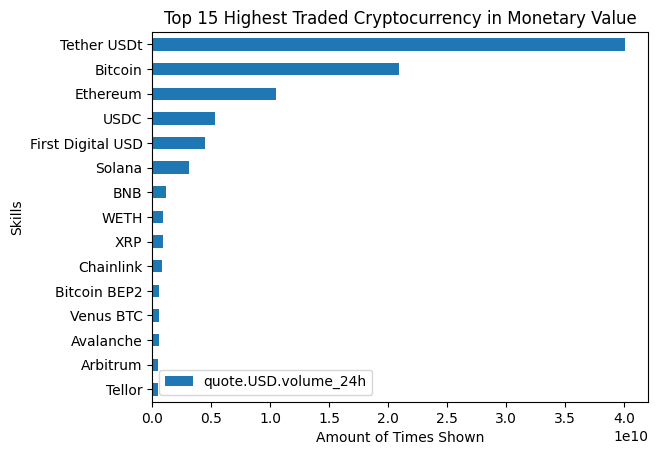

In [68]:
import matplotlib.pyplot as plt
ax = plt 
ax = df[['name','quote.USD.volume_24h']].nlargest(15, 'quote.USD.volume_24h').dropna().set_index('name').sort_values(ascending = True, by = 'quote.USD.volume_24h').plot.barh(title= 'Top 15 Highest Traded Cryptocurrency in Monetary Value')
ax.set(xlabel='Amount of Times Shown', ylabel='Skills')
plt.savefig('CryptoGraph.png')
plt.show()


In [39]:
#df['quote.USD.price'].round(2).nlargest(15).dropna().sort_values(ascending = True)

In [40]:
#df[['name','quote.USD.volume_24h']]

In [41]:
#df[['name','quote.USD.volume_24h']].nlargest(15, 'quote.USD.volume_24h').set_index('name')

## Exporting graph as image

In [61]:
# had to save the plt in the same cell else it gets wiped
#plt.savefig('CryptoGraph.png')

<Figure size 640x480 with 0 Axes>

In [65]:
plt.show()